<a href="https://colab.research.google.com/github/raskutti/ipl/blob/main/economy_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Economy index

The aim of this colab is to investigate a new economy metric for bowlers in IPL, the **economy index**. Currently, economy rate is defined as total runs per over (discounting some runs such as byes and leg byes). This means that bowlers who bowl overs with higher scoring rates (powerplay, death) inherently have higher economy rates than bowlers who bowl overs with lower scoring rates (middle overs).

For example, Rashid has a much lower economy rate in IPL than Bumrah. However, Bumrah bowls overs in the powerplay and death, which tend to go for more runs. So how is better when accounting for this?

The **economy index** takes a bowler's economy in a given over and normalizes by the overall IPL economy in that over. An economy index less/more than 1 indicates the bowler on average concedes less/more (respectively) runs in the overs they bowl than the IPL average for those same overs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read file from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Copy path from drive
# https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020?resource=download
filepath = '/content/gdrive/MyDrive/Projects/IPL/IPL Ball-by-Ball 2008-2020.csv'

df_raw = pd.read_csv(filepath)

In [ ]:
df_raw.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
df = df_raw.copy()

## Definition

Suppose Bumrah has bowled $n_i$ balls in over $i$ for $i=0,...,19$ (note this data indexes at 0). Let $n = \sum_{i=0}^{19} n_i$ be the total number of balls Bumrah has bowled.

Let Bumrah's economy in over $i$ be $t_i$. Let the overall IPL economy in over $i$ be $T_i$. Then Bumrah's economy index for over $i$, $R_i$, is the ratio of his economy in over $i$ to the IPL economy in over $i$, namely $R_i = \frac{t_i}{T_i}$.

Define Bumrah's overall economy index $R$ as the average of his economy index in each over weighted by the balls bowled in each over.

$$R = \frac{\sum_{i=0}^{19} R_i n_i}{n}$$

> **NOTE:** Economy rate does not count extras such as leg byes and byes, but this data does not contain that information, so we will approximate with `total_runs`.

## Data processing

In [ ]:
# Group by over and bowler.
# Each row contains the runs, balls, and economy for a given bowler for a given
# over in IPL.
df_over_bowler = df.groupby(['over', 'bowler']).agg(
    {'total_runs': ['sum', 'count']}).reset_index()
df_over_bowler['economy'] = 6 * df_over_bowler.total_runs['sum'] / df_over_bowler.total_runs['count']
df_over_bowler.head(25)

over           bowler total_runs          economy
                                sum count           
0     0       A Chandila         65    72   5.416667
1     0      A Choudhary         22    18   7.333333
2     0         A Kumble         39    49   4.775510
3     0         A Mishra         10    13   4.615385
4     0          A Nehra        171   159   6.452830
5     0         A Nortje         10    12   5.000000
6     0          A Singh         14    19   4.421053
7     0        A Symonds          6     7   5.142857
8     0        AA Chavan         40    57   4.210526
9     0  AA Jhunjhunwala          5     6   5.000000
10    0       AB Agarkar          6     8   4.500000
11    0         AB Dinda        145   175   4.971429
12    0        AC Thomas         54    67   4.835821
13    0   AD Mascarenhas         52    36   8.666667
14    0       AD Russell         61    68   5.382353
15    0         AF Milne         19    20   5.700000
16    0       AG Murtaza          9    12   4.500000
17    0         AJ Finch          3     6   3.000000
18    0       AL Menaria         23    26   5.307692
19    0         AN Ahmed         28    14  12.000000
20    0          AP Dole         13     8   9.750000
21    0         AR Patel         27    25   6.480000
22    0       AS Rajpoot         70    65   6.461538
23    0     Ankit Sharma         57    60   5.700000
24    0   Arshdeep Singh         23    19   7.263158

In [ ]:
# Group by over to compare to overall IPL.
# Each row contains the runs, balls, and economy for a given over in all IPL.
df_over = df.groupby('over').agg({'total_runs': ['sum', 'count']}).reset_index()
df_over['economy'] = 6 * df_over.total_runs['sum'] / df_over.total_runs['count']
df_over

over total_runs           economy
               sum  count           
0     0       9804  10254   5.736688
1     1      11642  10255   6.811507
2     2      13005  10155   7.683900
3     3      13348  10115   7.917746
4     4      13405  10092   7.969679
5     5      13470  10067   8.028211
6     6      10840  10021   6.490370
7     7      11548   9993   6.933654
8     8      11999   9964   7.225411
9     9      11875   9920   7.182460
10   10      12199   9864   7.420316
11   11      12458   9833   7.601749
12   12      12542   9806   7.674077
13   13      12897   9712   7.967669
14   14      13326   9638   8.295912
15   15      13449   9477   8.514720
16   16      13989   9358   8.969224
17   17      14307   9086   9.447722
18   18      13804   8531   9.708592
19   19      12887   7327  10.553023

In [ ]:
# Join on over number.
df_over_bowler_joined = df_over_bowler.join(
    df_over, on='over', rsuffix='_IPL_overall')
df_over_bowler_joined.head(25)

over           bowler total_runs          economy over_IPL_overall  \
                                sum count                               
0     0       A Chandila         65    72   5.416667                0   
1     0      A Choudhary         22    18   7.333333                0   
2     0         A Kumble         39    49   4.775510                0   
3     0         A Mishra         10    13   4.615385                0   
4     0          A Nehra        171   159   6.452830                0   
5     0         A Nortje         10    12   5.000000                0   
6     0          A Singh         14    19   4.421053                0   
7     0        A Symonds          6     7   5.142857                0   
8     0        AA Chavan         40    57   4.210526                0   
9     0  AA Jhunjhunwala          5     6   5.000000                0   
10    0       AB Agarkar          6     8   4.500000                0   
11    0         AB Dinda        145   175   4.971429                0   
12    0        AC Thomas         54    67   4.835821                0   
13    0   AD Mascarenhas         52    36   8.666667                0   
14    0       AD Russell         61    68   5.382353                0   
15    0         AF Milne         19    20   5.700000                0   
16    0       AG Murtaza          9    12   4.500000                0   
17    0         AJ Finch          3     6   3.000000                0   
18    0       AL Menaria         23    26   5.307692                0   
19    0         AN Ahmed         28    14  12.000000                0   
20    0          AP Dole         13     8   9.750000                0   
21    0         AR Patel         27    25   6.480000                0   
22    0       AS Rajpoot         70    65   6.461538                0   
23    0     Ankit Sharma         57    60   5.700000                0   
24    0   Arshdeep Singh         23    19   7.263158                0   

   total_runs_IPL_overall        economy_IPL_overall  
                      sum  count                      
0                    9804  10254            5.736688  
1                    9804  10254            5.736688  
2                    9804  10254            5.736688  
3                    9804  10254            5.736688  
4                    9804  10254            5.736688  
5                    9804  10254            5.736688  
6                    9804  10254            5.736688  
7                    9804  10254            5.736688  
8                    9804  10254            5.736688  
9                    9804  10254            5.736688  
10                   9804  10254            5.736688  
11                   9804  10254            5.736688  
12                   9804  10254            5.736688  
13                   9804  10254            5.736688  
14                   9804  10254            5.736688  
15                   9804  10254            5.736688  
16                   9804  10254            5.736688  
17                   9804  10254            5.736688  
18                   9804  10254            5.736688  
19                   9804  10254            5.736688  
20                   9804  10254            5.736688  
21                   9804  10254            5.736688  
22                   9804  10254            5.736688  
23                   9804  10254            5.736688  
24                   9804  10254            5.736688

In [ ]:
def aggregate_bowler(row):
  return {
      'balls_bowled': sum(row.total_runs['count']),
      'economy_index': sum(row.economy * row.total_runs['count'] / row.economy_IPL_overall) / sum(row.total_runs['count']),
      'traditional_economy': 6 * sum(row.total_runs['sum']) / sum(row.total_runs['count']),
  }

In [ ]:
pd_series_bowler = df_over_bowler_joined.groupby('bowler').apply(aggregate_bowler)

In [ ]:
# Can't find a good way to convert this series to dataframe.
dict_bowler = {}
for i, v in pd_series_bowler.items():
  dict_bowler[i] = v

df_bowler = pd.DataFrame.from_dict(dict_bowler, orient='index').reset_index()
df_bowler.head(25)

,index,balls_bowled,economy_index,traditional_economy
0,A Ashish Reddy,270,1.077048,8.888889
1,A Chandila,234,0.905480,6.282051
2,A Choudhary,108,1.069071,8.000000
3,A Dananjaya,25,1.548992,11.280000
4,A Flintoff,66,1.101829,9.636364
5,A Kumble,983,0.881222,6.646999
6,A Mishra,3233,0.948933,7.261986
7,A Mithun,312,1.134378,9.173077
8,A Nehra,1974,0.973777,7.711246
9,A Nel,18,1.341513,10.333333


## Who has the best economy index?

For bowlers who have bowled at least 10 overs...

In [ ]:
# Limit analysis to bowlers who have bowled more than 60 balls.
df_bowler_trimmed = df_bowler.loc[df_bowler.balls_bowled > 60]

In [ ]:
pd.set_option('display.max_rows', 1000)
df_bowler_trimmed.sort_values('economy_index', ascending=True).rename(columns={'index': 'bowler'})

,bowler,balls_bowled,economy_index,traditional_economy
379,Sohail Tanvir,265,0.788159,6.226415
119,FH Edwards,150,0.790967,6.400000
353,SM Harwood,67,0.796543,6.626866
312,Rashid Khan,1490,0.815875,6.334228
170,JW Hastings,61,0.820460,6.491803
385,T Thushara,144,0.832925,6.833333
151,JC Archer,858,0.835769,7.048951
355,SMSM Senanayake,195,0.840064,6.492308
358,SP Narine,2824,0.840668,6.815864
318,S Dube,66,0.852788,7.545455


Key findings:

- Rashid and Narine are, by this metric, more valuable than Bumrah, and the most valuable of bowlers who have bowled more than 1000 balls
- Ashwin is underrated, he has a better economy index than Bhuvneshwar
- Mustafizur is almost as valuable as Bumrah (but Bumrah has been at it for longer)
- Jofra Archer has started his IPL career extremely well

Play around with the table [here](https://docs.google.com/spreadsheets/d/14JYKeCO5PmjpCmYITmRJ2RzXrDYtkAsgEVudEyIP__Y/edit?usp=sharing).

## Correlation between traditional economy and economy index

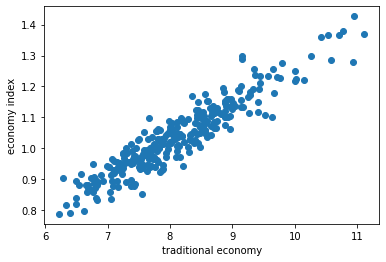

In [ ]:
plt.scatter(df_bowler_trimmed.traditional_economy, df_bowler_trimmed.economy_index)
plt.xlabel('traditional economy')
plt.ylabel('economy index')
plt.show()

In [ ]:
np.corrcoef(df_bowler_trimmed.traditional_economy, df_bowler_trimmed.economy_index)[0, 1]

0.9356713403248837

The correlation is *very* high, so maybe the cost of computing economy index isn't worth it. But it may be useful for pairwise comparisons, for example comparing who is more valuable, Rashid or Bumrah.